In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

In [2]:
zmin = 0.01
zmax = 6.0
zgrid = np.logspace(np.log10(zmin), np.log10(zmax), 500)
rgrid = cosmo.comoving_distance(zgrid)
def get_redshift(proper_dist): return np.interp(proper_dist, rgrid.value, zgrid)

In [3]:
halos_I = np.load('halo2fluxmap/websky-cib/radio_I_sats/websky_halos-light.pksc_censat_145.0.npz')
halos_II = np.load('halo2fluxmap/websky-cib/radio_II_sats/websky_halos-light.pksc_censat_145.0.npz')

In [4]:
lsat_I, fsat_I = halos_I['lsat'], halos_I['fsat']
x_I, y_I, z_I = halos_I['xsat'], halos_I['ysat'], halos_I['zsat']
r_I = np.sqrt(x_I**2 + y_I**2 + z_I**2) # comoving radial distance
redshifts_I = get_redshift(r_I)

lsat_II, fsat_II = halos_II['lsat'], halos_II['fsat']
x_II, y_II, z_II = halos_II['xsat'], halos_II['ysat'], halos_II['zsat']
r_II = np.sqrt(x_II**2 + y_II**2 + z_II**2) # comoving radial distance
redshifts_II = get_redshift(r_II)

In [5]:
redshift_cut = 0.3
lowz_lsat_I = (lsat_I)[redshifts_I < redshift_cut]
lowz_lsat_II = (lsat_II)[redshifts_II < redshift_cut]

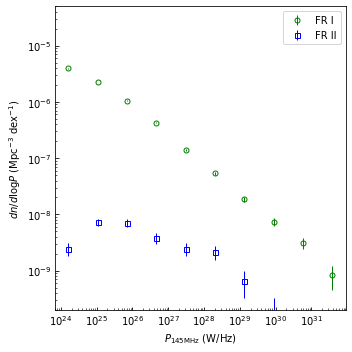

In [8]:
n_I, bins = np.histogram( np.log10(lowz_lsat_I), 
         bins=10, range=(23.8,32) )
n_II, bins = np.histogram( np.log10(lowz_lsat_II), 
         bins=10, range=(23.8,32) )


mids = (bins[:-1] + bins[1:]) / 2.0

norm = cosmo.comoving_volume(redshift_cut).value * (bins[1:] - bins[:-1])

plt.figure(figsize=(5,5))
plt.errorbar(10**mids, n_I / norm,
            yerr=np.sqrt(n_I)/norm, fmt='go', lw=1,
            markersize=5, markeredgewidth=1, markerfacecolor='none',
            label='FR I')

plt.errorbar(10**mids, n_II / norm,
            yerr=np.sqrt(n_II)/norm, fmt='bs', lw=1,
            markersize=5, markeredgewidth=1, markerfacecolor='none',
            label='FR II')


plt.legend()
plt.ylabel(r'$dn/d\log P$ ($\mathrm{Mpc}^{-3}$ dex$^{-1}$)')
plt.xlabel(r'$P_{145 \mathrm{MHz}}$ (W/Hz)')
plt.yscale('log')
plt.ylim(2e-10,5e-5)
plt.xscale('log')
plt.gca().tick_params(which='both',direction="in")
plt.tight_layout()